# Analyzing Tabular Data using Pandas

## Read a CSV file using Pandas

Pandas is typically for working in tabular data  (simliar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formates like CSV, Exel spreadsheet, HTML tables, JSON, SQL and more. Let's download a file **italy-covid-daywise.txt** which contains daywise Covid-19 data for Italy.

+ **CSVs**: A comma-seperated values (CSV) file is a delimited text file that uses a comma to seperate values. Each line of the file is a data record. Each record consists of one ore more fields, seperated by commas. A CSV file typically stores tabular data (numbers and text) in plain text in which case each line will have the same number of fields.

We will download this file using the **urlretieve** function from the **urllib.request** module.

In [1]:
from urllib.request import urlretrieve

In [2]:
urlretrieve("http://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv", 
            "italy-covid-daywise.csv")

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1a8ebba5340>)

To read the file, we can use the **read_csv** method from Pandas. Let's being by improving the Pandas library. It is typically imported with the alias **pd**.

In [3]:
import pandas as pd

In [4]:
covid_df = pd.read_csv("italy-covid-daywise.csv")

In [5]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Data from the file is read and stored in a **DataFrame** object-one of the core data structures in Pandas for storing and working with tabular data. We typically use the **_df** suffix in the variable names for dataframes.

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df.info

<bound method DataFrame.info of            date  new_cases  new_deaths  new_tests
0    2019-12-31        0.0         0.0        NaN
1    2020-01-01        0.0         0.0        NaN
2    2020-01-02        0.0         0.0        NaN
3    2020-01-03        0.0         0.0        NaN
4    2020-01-04        0.0         0.0        NaN
..          ...        ...         ...        ...
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN

[248 rows x 4 columns]>

It appears that each column contains values of a specific data type. For te numerical columns, you can view the some statistical information like mean, standard deviation, minimum/maximum values and number of non-empty values using the **.describe** method.

In [8]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


The **columns** property contains the list of columns within the data frame.

In [9]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

You can also retrieve the number of rows and columns in the data frame using the **.shape** method.

Here is a summary of the functions & methods we've looked at so far:

+ **pd.read_csv** - Read data from CSV file into a Pandas **DataFrame** object
+ **.info()** - View basic information about rows, columns & columns
+ **.decribe()** - View statistical information about numerical columns
+ **.columns** - Get the list of column names
+ **.shape** - Get the number of rows & columns as a tuple

## Retrieve Data from a Data Frame

The first thing you might want to do is to retrieve data from this data frame e.g. the counts of a specific day or the list of values in a specific column. To do this, it might help to understand the interal representation of data in a data frame. Conceptually, you can think of a datafame as a dictonary of lists: the keys are column names, and the values are lists/arrays containing data for the respective columns.

In [10]:
# Pandas format is simlier to this:
covid_df_dict = {
    "data": ["2020-08-30", "2020-08-31", "2020-09-02", "2020-09-01", "2020-09-03"],
    "new_cases": [1444, 1365, 996, 975, 1326], 
    "new_deaths": [1, 4, 6, 8, 6], 
    "new_tests": [5341, 4283, 54395, None, None]
}

In [11]:
covid_df_dict

{'data': ['2020-08-30',
  '2020-08-31',
  '2020-09-02',
  '2020-09-01',
  '2020-09-03'],
 'new_cases': [1444, 1365, 996, 975, 1326],
 'new_deaths': [1, 4, 6, 8, 6],
 'new_tests': [5341, 4283, 54395, None, None]}

Representing data in the above format has a few benefits:

+ All values in a column typically have the same type of value, so it's more efficient to store them  in  single array.
+ Retrieving the values for a particular row simply requires extracting the elements at a given index from each of the column arrays.
+ The representation is more compact (column names are recorded only one) compared to other formats where you might use a dictonary for each row of data (exmple shown below).

In [12]:
type(covid_df)

pandas.core.frame.DataFrame

Just like arrays, you can retrieve a specific value with a series using the indexing notation.

In [13]:
covid_df["new_cases"][200]

231.0

To access a specific row of data Pandas provides the **.iloc** method.

In [14]:
covid_df.iloc[:, 0]  # : ==> rows, 1 ==> columns

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

Each retrieved row is also a **Series** object.

In [15]:
type(covid_df.iloc[:, 0])

pandas.core.series.Series

To view the first or last few rows of data, we can use the **.head** and **.tail** methods.

In [16]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [17]:
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


We can find the first index that doesn't contain a **NaN** value using **first_valid_index** method of a series.

In [18]:
covid_df.new_tests.first_valid_index()

111

Let's look at a few rows before and after this index to verify that the values indeed change from **NaN** to actual numbers. We can do this by passing a range to **.iloc** method.

In [19]:
covid_df.iloc[108:113, :]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0


The **.sample** method can be used to retrieve a random sample of rows from the dataframe.

In [20]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
202,2020-07-20,218.0,3.0,14121.0
164,2020-06-12,379.0,53.0,37651.0
195,2020-07-13,234.0,9.0,14006.0
17,2020-01-17,0.0,0.0,NaN
14,2020-01-14,0.0,0.0,NaN
158,2020-06-06,518.0,85.0,34036.0
167,2020-06-15,338.0,44.0,17463.0
55,2020-02-24,53.0,0.0,NaN
28,2020-01-28,0.0,0.0,NaN
70,2020-03-10,1797.0,98.0,NaN


## Analyzing Data from DataFrame

Let's try to answer some questions about our data.

**Q: What is the total number of reported cases and deaths related to Covid-19 in Italy?**

Similar to Numpy arrays, a Pandas series supports the **.sum** method to answer these questions.

In [21]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [22]:
print("Total cases: {}".format(total_cases))

Total cases: 271515.0


In [23]:
print("Total deaths: {}".format(total_deaths))

Total deaths: 35497.0


**Q: What is the death rate (ratio of reported deaths to reported cases)?**

In [24]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [25]:
print("The overall reported death rate in Italy is {:.3f}".format(death_rate))

The overall reported death rate in Italy is 0.131


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were being reported.**

We can check the first non-NaN index using **first_valid_index**.

In [26]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [27]:
total_tests

5214766.0

**Q: What function of test returned a postive result?**

In [28]:
postive_rate = total_cases / total_tests

In [29]:
print("{:.2f}% of tests in Italy led to a postive diagnosis.".format(postive_rate))

0.05% of tests in Italy led to a postive diagnosis.


Apart from this, you can use mathetical operation like **.sum**, **.max**, **.min**, **.count** to analyze data.

## Querying and Sorting Rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [30]:
high_new_cases = covid_df["new_cases"] > 1000

In [31]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

The boolean expression returns a series containing **True** and **False** boolean values. This series can be used to filter out just those rows where the value in the series is **True**. The result is data frame with a subset of rows from the original.

In [32]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can write  this succintly on a single line by passing the boolean expression as an index to the data frame.

In [33]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [34]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


The data frame contains 72 rows, but only the first 5 & last 5 rows are displayed by default with Jupyter for brevity. To view, all the rows, we can only modify display options.

In [35]:
from IPython.display import display

with pd.option_context("display.max_rows", 500):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the the ratio of cases reported to tests conducted is higher than the overall **postive_rate**.

In [36]:
postive_rate

0.05206657403227681

In [37]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > postive_rate]

In [38]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


Performing operations on multiple columns results in a new series.

In [39]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

Further, we can use this series to add a new column to the data frame.

In [40]:
covid_df["postive_rate"] = covid_df.new_cases / covid_df.new_tests

In [41]:
covid_df

,date,new_cases,new_deaths,new_tests,postive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


Keep in mind however, sometimes it takes a few days to get the result for a test, so we can't really compare the number of new cases conducted on the same day. Any inference based on this **postive_rate** column is likely to be incorrect. It's important to require some external context. It's always a good idea to read  through the documentation provided with the dataset or ask for more information.

For now, let's remove the **postive_rate** column using the **drop** method.

In [42]:
covid_df.drop(columns = ["postive_rate"], inplace = True)

In [43]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [44]:
covid_df.isnull()

,date,new_cases,new_deaths,new_tests
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
243,False,False,False,False
244,False,False,False,False
245,False,False,False,False
246,False,False,False,True


In [45]:
pd.DataFrame(covid_df).isnull().sum()

date            0
new_cases       0
new_deaths      0
new_tests     113
dtype: int64

### Sorting rows using column values

The rows can also be sorted by specific column using **.sort_values**. Let's sort to indetify the days with highest number of cases, then chain it with the **.head** method to get the 10 days with the most cases.

In [46]:
covid_df.sort_values("new_cases", ascending = False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [47]:
covid_df.sort_values("new_cases", ascending = True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


## Working with Dates

While we have looked at overall numbers for the cases, tests, postive rate ect. It would be also useful to study these numbers on month by month basis. The **date** column might come in handy here, as Pandas provides many utilities for working with dates.

In [48]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently **object**, so Pandas does not know that this column is a date. We can covert it into a **datetime** column using the **pd.to_datetime** method.

In [49]:
covid_df["date"] = pd.to_datetime(covid_df.date)

In [50]:
covid_df["date"]

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [51]:
type(covid_df["date"])

pandas.core.series.Series

You can see that it now has the datetype **datetime64**. We can now extract different parts of the data into seperate columns, using the **DatetimeIndex** class.

In [52]:
covid_df["year"] = pd.DatetimeIndex(covid_df.date).year
covid_df["month"] = pd.DatetimeIndex(covid_df.date).month
covid_df["day"] = pd.DatetimeIndex(covid_df.date).day
covid_df["weekday"] = pd.DatetimeIndex(covid_df.date).weekday

In [53]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Let's check the overall metrics for the month of May. We query the rows for May, choose a subset of columns that we want to aggregate, and use the **.sum** method of the data frame to get the sum of values in each  chosen column.  

In [54]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

In [55]:
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [56]:
# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[["new_cases", "new_deaths", "new_tests"]]

In [57]:
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [58]:
# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [59]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [60]:
type(covid_may_totals)

pandas.core.series.Series

The operations about can also be combined into a single statement.

In [61]:
covid_df[covid_df.month == 5][["new_cases", "new_deaths", "new_tests"]].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Here's another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time, we might want to aggreagate using the **.mean** method.

In [62]:
# Overall average
covid_df.new_cases.mean()

1094.8185483870968

In [63]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

## Grouping and Aggregation

As a next step, we might want to summarize the daywise data and create a new dataframe with month-wise data. This is where the **.groupby** function is useful. Along with a grouping, we need to specify a way to aggregate the data for each group.

In [64]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [65]:
monthly_groups = covid_df.groupby("month")

In [66]:
monthly_groups[["new_cases", "new_deaths", "new_tests"]].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [67]:
covid_month_df = covid_df.groupby("month")[["new_cases", "new_deaths", "new_tests"]]

In [68]:
covid_month_df

The result is a new data frame, which uses unique values from the column passed to  **groupby** as the index. Grouping and aggregation is a really powerful method of progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggreagte by other measures like mean.

In [69]:
covid_month_mean_df = covid_df.groupby("weekday")[["new_cases", "new_deaths", "new_tests"]].mean()

In [70]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1185.800000,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


Apart from grouping, another form of aggregation is to calculate the running or cumulative sum of cases, tests, or deaths up to current date for each row. This can be done using **.cumsum** method. Let's add 3 new columns: **total_cases**, **total_deaths** and **total_tests**

In [71]:
covid_df["total_cases"] = covid_df.new_cases.cumsum()

In [72]:
covid_df["total_deaths"] = covid_df.new_deaths.cumsum()

In [73]:
covid_df["total_tests"] = covid_df.new_tests.cumsum() + initial_tests

We've also include the intial test count in **total_tets** to account for test conducted before daily reporting wa started.

In [74]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN


## Merging Data from Multiple Sources

To determine other metrics like test per million, cases per million etc. We require more some information about the country viz. It's population. Let's download another file **locations.csv** which contains health-related information for different countries around the world, including Italy.

In [75]:
urlretrieve("https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv", 
            "locations.csv")

('locations.csv', <http.client.HTTPMessage at 0x1a8edfd0ac0>)

In [76]:
locations_df = pd.read_csv("locations.csv")

In [77]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [78]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [79]:
covid_df["location"] = "Italy"

In [80]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


We can now the columns from **location_df** into **covid_df** using the **.concat** method.

In [86]:
# axis ==> 1: vertical, 0: horizontal

In [87]:
concated_df = pd.concat([locations_df, covid_df], axis = 1)

In [88]:
concated_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,Andorra,Europe,77265.0,83.73,NaN,NaN,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy
245,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy
246,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


The location data for Italy is appended to each row within **covid_df**. If the **covid_df** data frame contained data for multiple locations, then the location-replaced data for the respective
country would be appended for each row.

We can calculate metrics like cases per million, deaths per nillion and tests per million.

In [91]:
concated_df["cases_per_million"] = concated_df.total_cases * 1e6 / concated_df.population

In [92]:
concated_df["deaths_per_million"] = concated_df.total_deaths * 1e6 / concated_df.population

In [93]:
concated_df["tests_per_million"] = concated_df.total_tests * 1e6 / concated_df.population

## Writing Data Back to File

After doing some analysis and adding new columns to the data frame, it would be a good idea to write the results back to file, otherwise the data will be lost when the Jupyter Notebook shuts down. Before writing to file, let us first create a data frame containing the specific set of columna that we want to write into the file.

In [94]:
result_df = concated_df[["date", 
                       "new_cases", 
                       "total_cases", 
                       "new_deaths", 
                       "total_deaths", 
                       "new_tests", 
                       "total_tests", 
                       "cases_per_million", 
                       "deaths_per_million", 
                       "tests_per_million"]]

In [95]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,NaN,NaN,NaN
244,2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,NaN,NaN,NaN
245,2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,NaN,NaN,NaN
246,2020-09-02,975.0,270189.0,8.0,35491.0,NaN,NaN,NaN,NaN,NaN


To write the data from the data frame into a file, we can use the **.to_csv** function.

In [96]:
result_df.to_csv("results.csv", index = None)

## Bonus: Basic Plotting with Python

While we typically use a library like **matplotlib** or **seaborn** plot graphs with a Jupyter Notebook, Pandas data frames & series also provide a handy **.plot** method for quick and easy plotting.

Let's piot graph showing how the no. of daily casesvaries over time using the **.plot** method of a Pandas series.

<AxesSubplot:>

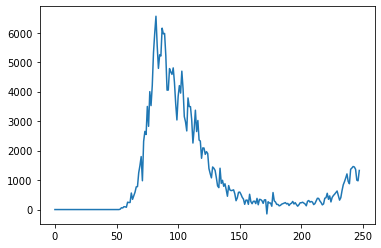

In [97]:
result_df.new_cases.plot()

While this plot shows the overall trend. It's hard to tell where the park occured, as there are no dates on the X axis. We can use the **data** column as the index for the data frame to address this issue.

In [98]:
result_df.set_index("date", inplace = True)

In [99]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,NaN,NaN,NaN
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,NaN,NaN,NaN
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,NaN,NaN,NaN


That's right, the index of a data frame doesn't have to be numeric. Turn the date into the index also allows us to get the data for a specific data using **.loc**.

In [100]:
result_df.loc["2020-09-01"]

new_cases                 996.0
total_cases            269214.0
new_deaths                  6.0
total_deaths            35483.0
new_tests               54395.0
total_tests           5214766.0
cases_per_million           NaN
deaths_per_million          NaN
tests_per_million           NaN
Name: 2020-09-01 00:00:00, dtype: float64

Let's piot the new cases & new deaths per day as line graphs.

<AxesSubplot:xlabel='date'>

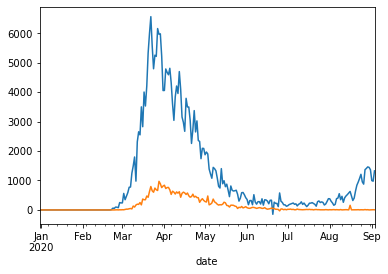

In [101]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

We can also compare the total cases vs. total deaths.

<AxesSubplot:xlabel='date'>

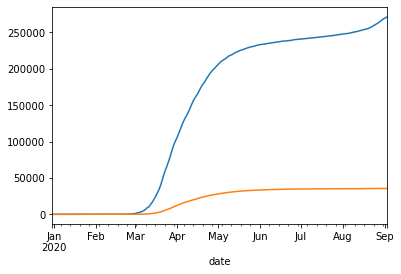

In [102]:
result_df.total_cases.plot()
result_df.total_deaths.plot()

Let's see how the death rate and postive testing rates vary over time.

In [103]:
death_rate = result_df.total_deaths / result_df.total_cases

<AxesSubplot:title={'center':'Death Rate'}, xlabel='date'>

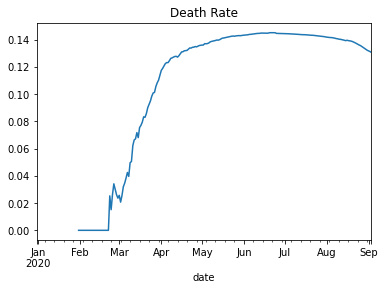

In [104]:
death_rate.plot(title = "Death Rate")

<AxesSubplot:title={'center':'Positive Rate'}, xlabel='date'>

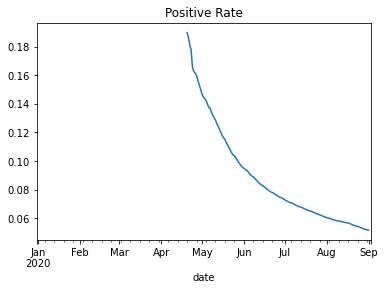

In [105]:
postive_rates = result_df.total_cases / result_df.total_tests
postive_rates.plot(title = "Positive Rate")

Finally, let's plot some month-wise data using a bar chart to visiulize the trend at a higher level.

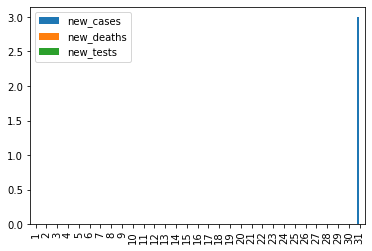

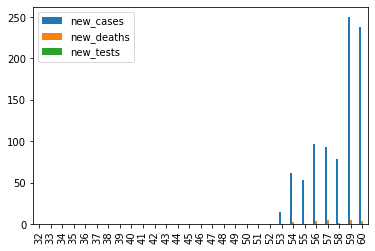

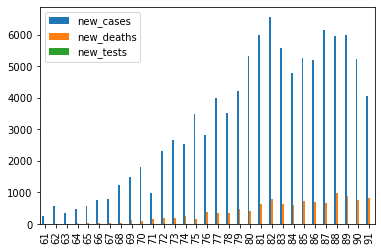

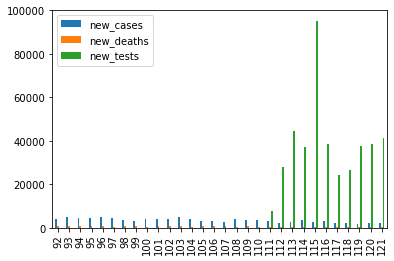

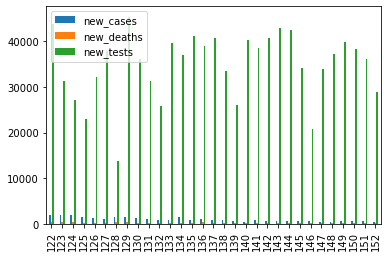

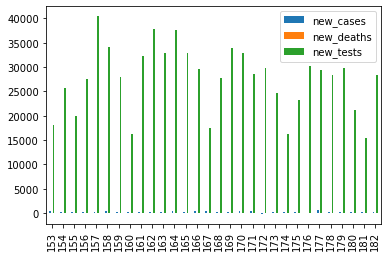

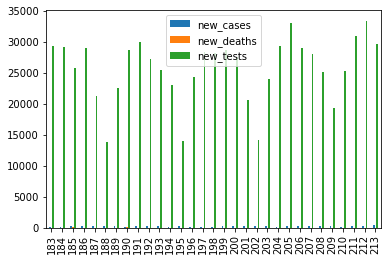

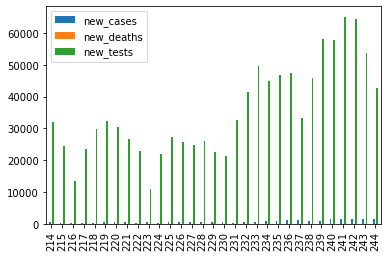

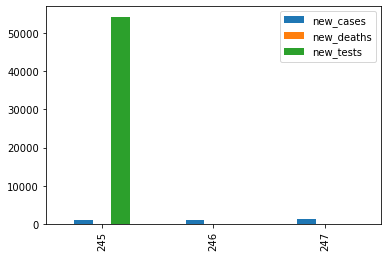

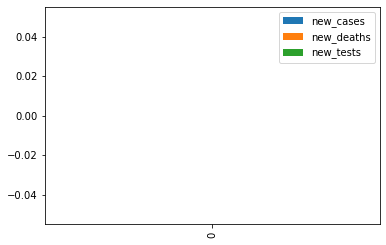

In [106]:
covid_month_df.plot(kind = "bar");